In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho biểu đồ
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [22]:
# Tải dữ liệu
df = pd.read_csv('../data/processed/customer_features_scaled.csv', index_col=0)

# Hiển thị thông tin cơ bản
print("="*60)
print("THÔNG TIN DỮ LIỆU KHÁCH HÀNG")
print("="*60)
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số lượng khách hàng: {df.shape[0]}")
print(f"Số đặc trưng: {df.shape[1] - 1} (không tính CustomerID)")
print("\nKiểu dữ liệu:")
print(df.dtypes.value_counts())
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum().sum())

# Hiển thị 10 dòng đầu tiên
print("\n" + "="*60)
print("10 DÒNG ĐẦU TIÊN CỦA DỮ LIỆU")
print("="*60)
display(df.head(10))

# Thống kê mô tả
print("\n" + "="*60)
print("THỐNG KÊ MÔ TẢ CÁC ĐẶC TRƯNG")
print("="*60)
display(df.describe())

THÔNG TIN DỮ LIỆU KHÁCH HÀNG
Kích thước dữ liệu: (3921, 16)
Số lượng khách hàng: 3921
Số đặc trưng: 15 (không tính CustomerID)

Kiểu dữ liệu:
float64    16
Name: count, dtype: int64

Kiểm tra giá trị thiếu:
0

10 DÒNG ĐẦU TIÊN CỦA DỮ LIỆU


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,4.984467,1.506343,-0.268408,4.595722,2.432481,4.773105,2.067962,2.330682,3.094080,0.761335,0.914696,2.100059,2.332104,1.979686,-0.076864,2.392380
012346,3.789233,-2.120154,3.800623,3.161700,-1.158633,-2.296006,-1.015864,-2.307499,-2.100457,8.847780,3.719362,7.377665,-2.141668,3.384916,3.763263,3.337067
012747,0.879252,0.879583,1.007144,1.397472,1.532615,0.156943,1.957285,-0.614124,0.749921,-0.306106,0.973710,0.485241,1.078802,1.041469,0.667948,1.526344
012748,3.038005,-0.106556,-1.068898,2.706127,2.352800,3.983682,1.982065,0.343236,1.872665,-0.238979,-0.080428,-0.710410,-0.049208,0.348309,-0.892187,-0.000881
012749,0.982814,1.125208,0.282588,1.379978,0.890138,1.397000,0.537992,1.095989,1.056342,0.756329,0.259518,1.527988,1.056653,-0.159892,0.290885,0.329836
012820,0.466642,-0.817031,-0.019920,0.296923,0.656870,0.395429,-0.412569,-0.123289,-0.824860,0.189404,-0.105017,-0.181951,-0.935154,0.238579,0.003600,-0.128951
012821,-1.233887,-0.235351,-0.060898,-1.725684,-1.158633,-1.361354,-1.015864,-1.051000,-0.261189,-0.848867,-0.151699,-1.489691,-0.233985,0.110322,-0.025617,-0.255883
012822,0.268811,-0.078187,0.286568,0.302366,-0.198605,0.135925,-0.081936,0.397982,-0.164225,0.676729,0.348066,0.785080,-0.141162,0.261716,0.260265,0.220589
012823,-0.366422,1.825216,2.528634,0.774998,0.890138,-2.296006,2.064151,-2.307499,1.669397,-1.283030,2.429015,0.374043,1.836621,2.299290,2.554670,2.796227



THỐNG KÊ MÔ TẢ CÁC ĐẶC TRƯNG


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03
mean,-3.805508e-17,-5.857764e-16,-3.261864e-16,9.459406e-16,-9.083386e-17,2.002422e-16,1.111027e-14,8.788912e-17,-2.736342e-16,1.449717e-16,6.197542e-16,-6.596214e-16,2.188167e-16,7.611016e-16,8.045932e-16,3.588051e-16
std,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00
min,-3.896876e+00,-5.067008e+00,-2.990330e+00,-5.044877e+00,-1.158633e+00,-2.296006e+00,-1.015864e+00,-2.307499e+00,-5.074112e+00,-4.203302e+00,-3.040894e+00,-5.999848e+00,-5.142010e+00,-2.989922e+00,-3.000570e+00,-3.171553e+00
25%,-6.591049e-01,-5.514354e-01,-4.777078e-01,-6.500921e-01,-1.158633e+00,-6.952368e-01,-1.015864e+00,-6.548057e-01,-5.604749e-01,-5.776754e-01,-4.208586e-01,-6.014446e-01,-5.535509e-01,-5.706998e-01,-5.044369e-01,-4.495742e-01
50%,-2.971108e-02,4.050080e-02,7.679312e-02,3.134347e-03,-1.986045e-01,-8.633045e-04,-2.319911e-01,2.313042e-02,4.560766e-02,2.907324e-02,2.264678e-02,6.590301e-02,5.758304e-02,6.679682e-02,9.760029e-02,1.929943e-02
75%,6.666738e-01,5.870022e-01,4.767525e-01,6.938682e-01,8.901385e-01,7.012805e-01,8.082498e-01,6.414923e-01,5.733896e-01,6.198659e-01,4.822760e-01,5.832868e-01,5.761183e-01,5.571399e-01,4.721849e-01,5.137110e-01
max,4.984467e+00,4.548624e+00,3.800623e+00,4.595722e+00,2.432481e+00,4.773105e+00,2.067962e+00,4.198694e+00,3.952637e+00,8.847780e+00,3.727192e+00,7.484176e+00,4.519095e+00,3.384916e+00,3.763263e+00,3.337067e+00


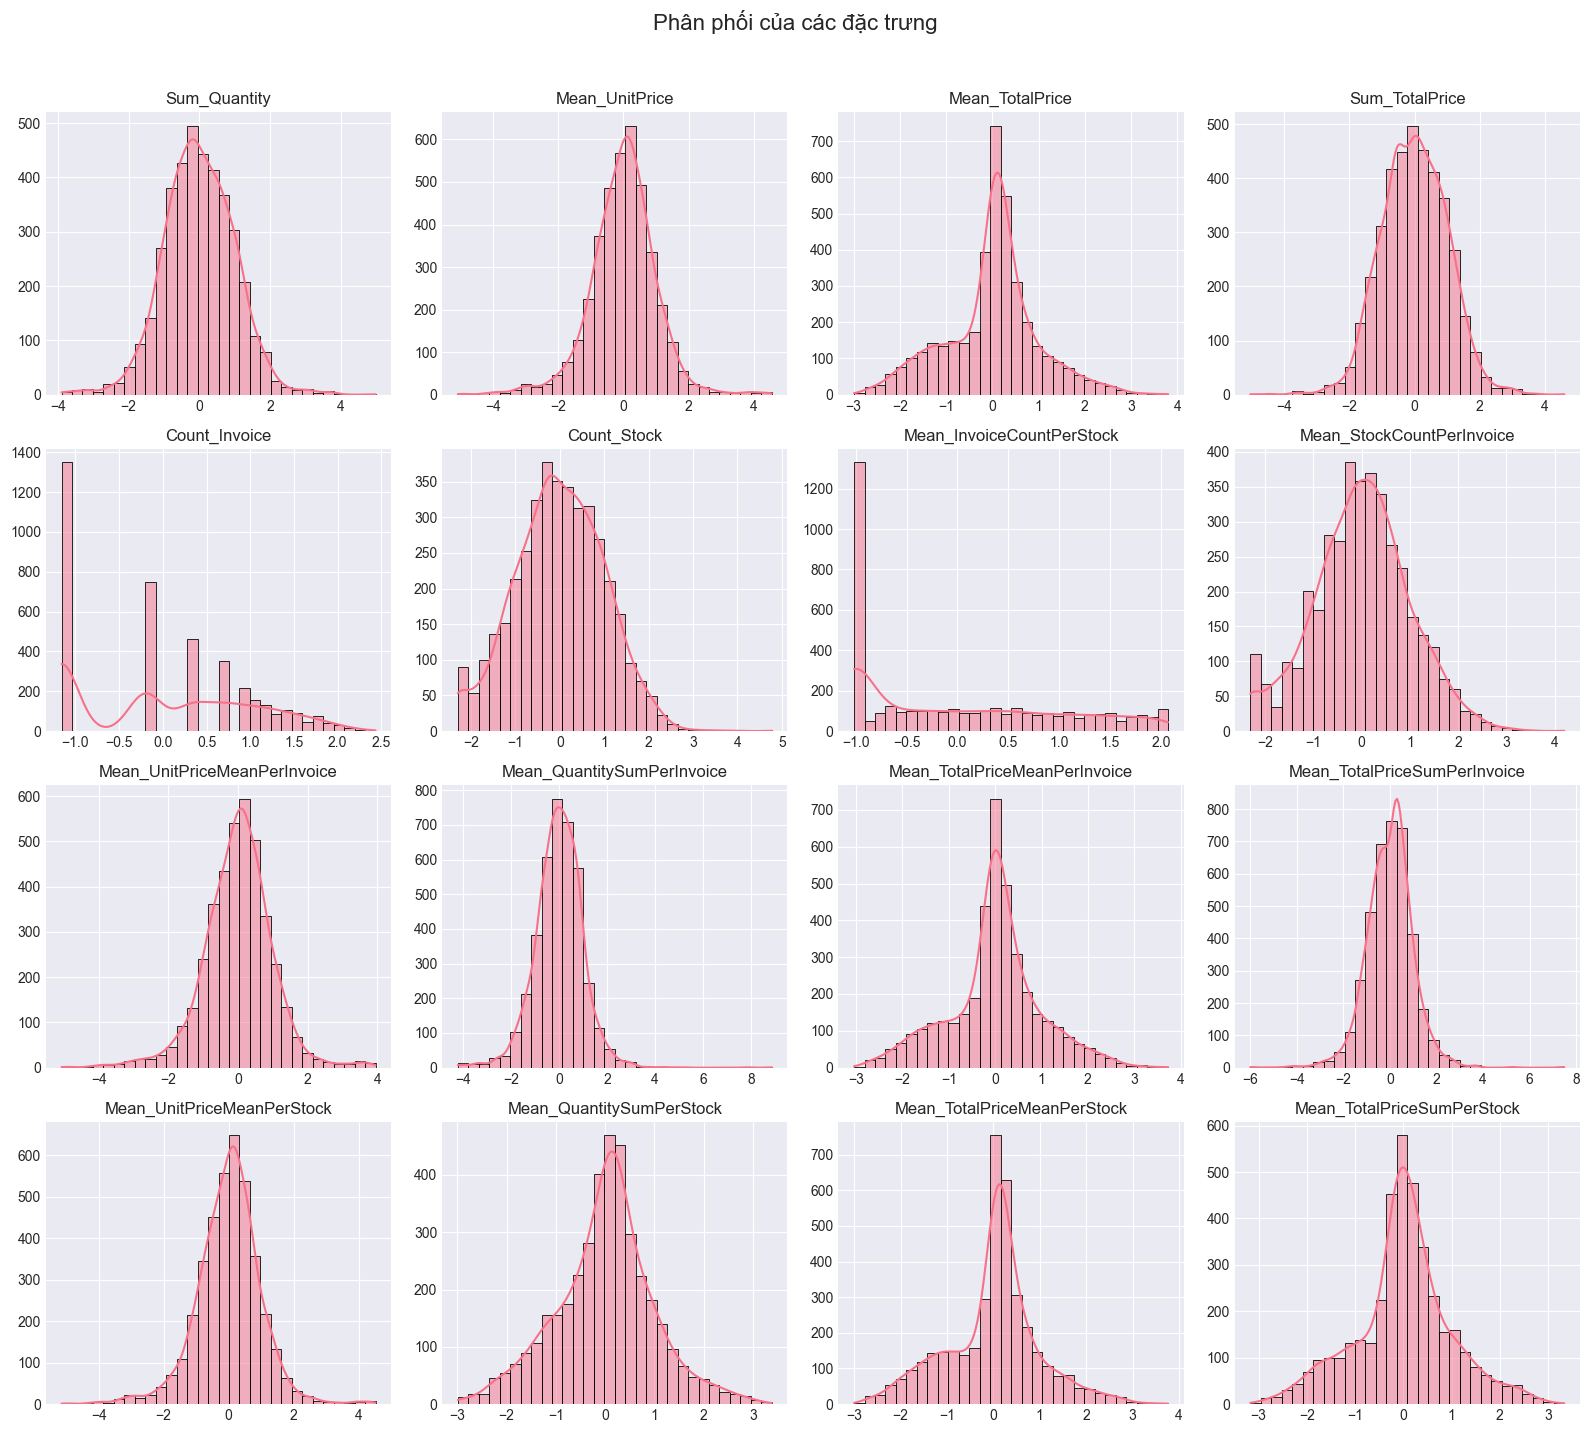


PHÂN TÍCH THÀNH PHẦN CHÍNH (PCA)


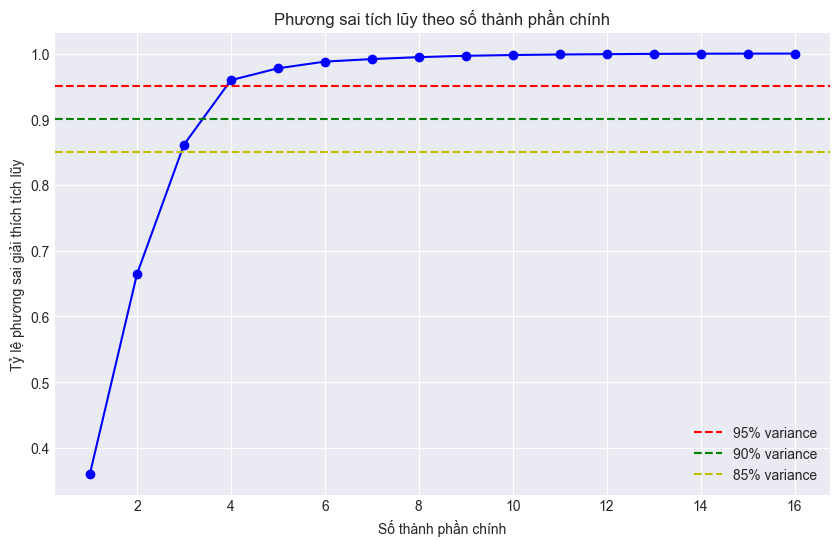

Phương sai giải thích bởi 5 thành phần: 0.978

Phương sai giải thích bởi từng thành phần:
  PC1: 0.361
  PC2: 0.303
  PC3: 0.197
  PC4: 0.098
  PC5: 0.018


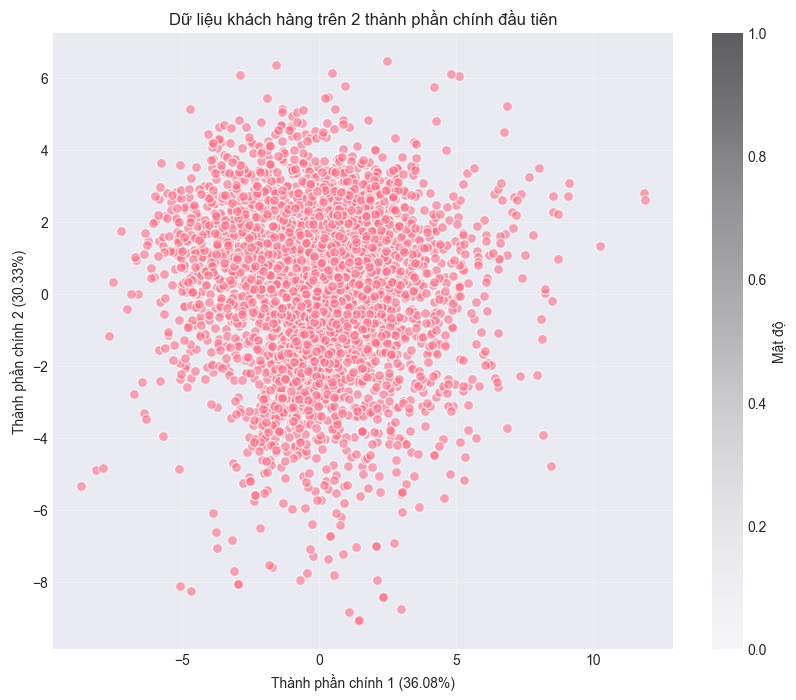

In [23]:
# Tách đặc trưng và ID khách hàng
customer_ids = df.index  # CustomerID là index
X = df 

# Kiểm tra phân phối của dữ liệu
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
fig.suptitle('Phân phối của các đặc trưng', fontsize=16, y=1.02)

for i, column in enumerate(X.columns[:16]):
    ax = axes[i//4, i%4]
    sns.histplot(X[column], kde=True, ax=ax, bins=30)
    ax.set_title(f'{column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Áp dụng PCA để giảm chiều
print("\n" + "="*60)
print("PHÂN TÍCH THÀNH PHẦN CHÍNH (PCA)")
print("="*60)

# Kiểm tra số chiều tối ưu
pca_full = PCA()
pca_full.fit(X)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
plt.axhline(y=0.85, color='y', linestyle='--', label='85% variance')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỷ lệ phương sai giải thích tích lũy')
plt.title('Phương sai tích lũy theo số thành phần chính')
plt.legend()
plt.grid(True)
plt.show()

# Chọn 5 thành phần chính (giải thích ~85% phương sai)
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print(f"Phương sai giải thích bởi {n_components} thành phần: {np.sum(pca.explained_variance_ratio_):.3f}")
print("\nPhương sai giải thích bởi từng thành phần:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {var:.3f}")

# Trực quan hóa 2 thành phần đầu tiên
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, edgecolors='w', s=50)
plt.xlabel(f'Thành phần chính 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Thành phần chính 2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('Dữ liệu khách hàng trên 2 thành phần chính đầu tiên')
plt.colorbar(scatter, label='Mật độ')
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
def compute_k_distance_plot(X, min_samples, plot=True):
    """
    Tính khoảng cách k-nearest neighbors và vẽ biểu đồ elbow
    để xác định eps tối ưu.
    """
    n_samples = X.shape[0]
    k = min(min_samples - 1, n_samples - 1)
    
    if k < 1:
        k = 1
    
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
    distances, _ = nbrs.kneighbors(X)
    k_distances = np.sort(distances[:, k])
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(len(k_distances)), k_distances, 'b-', linewidth=2)
        plt.xlabel('Điểm dữ liệu (sắp xếp theo khoảng cách)')
        plt.ylabel(f'Khoảng cách đến {k}-th neighbor')
        plt.title(f'K-distance Plot (min_samples={min_samples})')
        plt.grid(True, alpha=0.3)
        
        # Tìm elbow point
        n_points = len(k_distances)
        all_points = np.vstack((np.arange(n_points), k_distances)).T
        first_point = all_points[0]
        last_point = all_points[-1]
        line_vec = last_point - first_point
        norm = np.linalg.norm(line_vec)
        
        if norm > 0:
            line_vec_norm = line_vec / norm
            vec_from_first = all_points - first_point
            scalar_proj = np.dot(vec_from_first, line_vec_norm)
            proj = np.outer(scalar_proj, line_vec_norm)
            vec_to_line = vec_from_first - proj
            dist_to_line = np.linalg.norm(vec_to_line, axis=1)
            elbow_index = np.argmax(dist_to_line)
            eps_opt = float(k_distances[elbow_index])
            
            plt.axhline(y=eps_opt, color='r', linestyle='--', 
                       label=f'eps tối ưu = {eps_opt:.4f}')
            plt.axvline(x=elbow_index, color='r', linestyle='--')
            plt.legend()
        
        plt.show()
    
    return k_distances

def find_optimal_eps(X, min_samples):
    """
    Tìm eps tối ưu bằng phương pháp elbow.
    """
    k_distances = compute_k_distance_plot(X, min_samples, plot=False)
    
    # Tính toán elbow point
    n_points = len(k_distances)
    all_points = np.vstack((np.arange(n_points), k_distances)).T
    first_point = all_points[0]
    last_point = all_points[-1]
    line_vec = last_point - first_point
    norm = np.linalg.norm(line_vec)
    
    if norm == 0:
        return float(k_distances[-1])
    
    line_vec_norm = line_vec / norm
    vec_from_first = all_points - first_point
    scalar_proj = np.dot(vec_from_first, line_vec_norm)
    proj = np.outer(scalar_proj, line_vec_norm)
    vec_to_line = vec_from_first - proj
    dist_to_line = np.linalg.norm(vec_to_line, axis=1)
    
    elbow_index = np.argmax(dist_to_line)
    eps_opt = float(k_distances[elbow_index])
    
    return eps_opt

def run_dbscan_with_metrics(X, eps, min_samples):
    """
    Chạy DBSCAN và tính các chỉ số đánh giá.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # Thống kê kết quả
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    n_noise = np.sum(labels == -1)
    noise_rate = n_noise / len(labels)
    
    # Tính các chỉ số đánh giá (chỉ khi có ít nhất 2 cụm và có điểm không phải nhiễu)
    metrics = {
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_rate': noise_rate,
        'silhouette': None,
        'davies_bouldin': None,
        'labels': labels
    }
    
    # Chỉ tính metrics nếu có ít nhất 2 cụm và có đủ điểm không phải nhiễu
    mask = labels != -1
    if n_clusters > 1 and np.sum(mask) > 10 and len(np.unique(labels[mask])) > 1:
        try:
            metrics['silhouette'] = silhouette_score(X[mask], labels[mask])
            metrics['davies_bouldin'] = davies_bouldin_score(X[mask], labels[mask])
        except:
            pass
    
    return metrics

In [25]:
# Danh sách các giá trị min_samples cần thử
min_samples_values = list(range(5, 16))
results = []
labels_dict = {}

print("="*80)
print("THỬ NGHIỆM DBSCAN VỚI CÁC GIÁ TRỊ min_samples KHÁC NHAU")
print("="*80)

for ms in min_samples_values:
    print(f"\n{'='*60}")
    print(f"Thử nghiệm với min_samples = {ms}")
    print(f"{'='*60}")
    
    # Tìm eps tối ưu
    eps_opt = find_optimal_eps(X_pca, ms)
    print(f"  - eps tối ưu: {eps_opt:.4f}")
    
    # Chạy DBSCAN
    metrics = run_dbscan_with_metrics(X_pca, eps_opt, ms)
    
    # Lưu kết quả
    labels_dict[ms] = metrics['labels']
    
    result = {
        'min_samples': ms,
        'eps': eps_opt,
        'n_clusters': metrics['n_clusters'],
        'n_noise': metrics['n_noise'],
        'noise_rate': metrics['noise_rate'],
        'silhouette': metrics['silhouette'],
        'davies_bouldin': metrics['davies_bouldin']
    }
    results.append(result)
    
    # Hiển thị kết quả
    print(f"  - Số cụm: {metrics['n_clusters']}")
    print(f"  - Số điểm nhiễu: {metrics['n_noise']} ({metrics['noise_rate']:.2%})")
    if metrics['silhouette'] is not None:
        print(f"  - Silhouette score: {metrics['silhouette']:.4f}")
        print(f"  - Davies-Bouldin index: {metrics['davies_bouldin']:.4f}")

# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame(results)

# Hiển thị bảng kết quả
print("\n" + "="*80)
print("TỔNG HỢP KẾT QUẢ")
print("="*80)
display(results_df.sort_values('silhouette', ascending=False).reset_index(drop=True))

THỬ NGHIỆM DBSCAN VỚI CÁC GIÁ TRỊ min_samples KHÁC NHAU

Thử nghiệm với min_samples = 5
  - eps tối ưu: 1.5961
  - Số cụm: 3
  - Số điểm nhiễu: 162 (4.13%)
  - Silhouette score: 0.3625
  - Davies-Bouldin index: 0.5220

Thử nghiệm với min_samples = 6
  - eps tối ưu: 1.7148
  - Số cụm: 2
  - Số điểm nhiễu: 139 (3.55%)
  - Silhouette score: 0.3660
  - Davies-Bouldin index: 0.5909

Thử nghiệm với min_samples = 7
  - eps tối ưu: 1.8034
  - Số cụm: 1
  - Số điểm nhiễu: 121 (3.09%)

Thử nghiệm với min_samples = 8
  - eps tối ưu: 1.8667
  - Số cụm: 1
  - Số điểm nhiễu: 119 (3.03%)

Thử nghiệm với min_samples = 9
  - eps tối ưu: 1.8667
  - Số cụm: 1
  - Số điểm nhiễu: 129 (3.29%)

Thử nghiệm với min_samples = 10
  - eps tối ưu: 1.8924
  - Số cụm: 1
  - Số điểm nhiễu: 138 (3.52%)

Thử nghiệm với min_samples = 11
  - eps tối ưu: 1.9621
  - Số cụm: 1
  - Số điểm nhiễu: 135 (3.44%)

Thử nghiệm với min_samples = 12
  - eps tối ưu: 2.0137
  - Số cụm: 1
  - Số điểm nhiễu: 130 (3.32%)

Thử nghiệm với m

,min_samples,eps,n_clusters,n_noise,noise_rate,silhouette,davies_bouldin
0,6,1.714826,2,139,0.035450,0.366018,0.590910
1,5,1.596081,3,162,0.041316,0.362467,0.522043
2,7,1.803405,1,121,0.030859,NaN,NaN
3,8,1.866680,1,119,0.030349,NaN,NaN
4,9,1.866680,1,129,0.032900,NaN,NaN
5,10,1.892393,1,138,0.035195,NaN,NaN
6,11,1.962139,1,135,0.034430,NaN,NaN
7,12,2.013725,1,130,0.033155,NaN,NaN
8,13,2.038584,1,125,0.031880,NaN,NaN
9,14,2.062802,1,124,0.031625,NaN,NaN


In [26]:
# Tìm mô hình tốt nhất dựa trên silhouette score
best_result = results_df.loc[results_df['silhouette'].idxmax()] \
    if results_df['silhouette'].notna().any() else results_df.iloc[0]

print("="*80)
print("MÔ HÌNH TỐT NHẤT")
print("="*80)
print(f"min_samples: {best_result['min_samples']}")
print(f"eps: {best_result['eps']:.4f}")
print(f"Số cụm: {best_result['n_clusters']}")
print(f"Tỷ lệ nhiễu: {best_result['noise_rate']:.2%}")
print(f"Silhouette score: {best_result['silhouette']:.4f}")
print(f"Davies-Bouldin index: {best_result['davies_bouldin']:.4f}")

# Huấn luyện mô hình cuối cùng với tham số tốt nhất
best_min_samples = int(best_result['min_samples'])
best_eps = best_result['eps']

final_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
final_labels = final_dbscan.fit_predict(X_pca)

# Thêm nhãn vào dataframe gốc
df_final = df.copy()
df_final['cluster'] = final_labels

# Thống kê phân bố cụm
cluster_distribution = df_final['cluster'].value_counts().sort_index()
print("\n" + "="*80)
print("PHÂN BỐ ĐIỂM TRONG CÁC CỤM")
print("="*80)
print(cluster_distribution)

# Hiển thị thông tin chi tiết từng cụm
print("\n" + "="*80)
print("THÔNG TIN CHI TIẾT CÁC CỤM")
print("="*80)

for cluster_id in sorted(df_final['cluster'].unique()):
    cluster_data = df_final[df_final['cluster'] == cluster_id]
    if cluster_id == -1:
        print(f"\n🔹 NHIỄU (Cluster -1):")
    else:
        print(f"\n🔹 CLUSTER {cluster_id}:")
    print(f"   - Số lượng: {len(cluster_data)} khách hàng")
    print(f"   - Tỷ lệ: {len(cluster_data)/len(df_final):.2%}")
    
    # Thống kê một vài đặc trưng quan trọng cho mỗi cụm
    if cluster_id != -1 and len(cluster_data) > 1:
        important_features = ['Sum_Quantity', 'Mean_UnitPrice', 'Sum_TotalPrice', 'Count_Invoice']
        for feature in important_features:
            mean_val = cluster_data[feature].mean()
            std_val = cluster_data[feature].std()
            print(f"   - {feature}: {mean_val:.3f} ± {std_val:.3f}")

MÔ HÌNH TỐT NHẤT
min_samples: 6.0
eps: 1.7148
Số cụm: 2.0
Tỷ lệ nhiễu: 3.55%
Silhouette score: 0.3660
Davies-Bouldin index: 0.5909

PHÂN BỐ ĐIỂM TRONG CÁC CỤM
cluster
-1     139
 0    3775
 1       7
Name: count, dtype: int64

THÔNG TIN CHI TIẾT CÁC CỤM

🔹 NHIỄU (Cluster -1):
   - Số lượng: 139 khách hàng
   - Tỷ lệ: 3.55%

🔹 CLUSTER 0:
   - Số lượng: 3775 khách hàng
   - Tỷ lệ: 96.28%
   - Sum_Quantity: -0.003 ± 0.935
   - Mean_UnitPrice: 0.015 ± 0.887
   - Sum_TotalPrice: -0.001 ± 0.946
   - Count_Invoice: -0.004 ± 0.996

🔹 CLUSTER 1:
   - Số lượng: 7 khách hàng
   - Tỷ lệ: 0.18%
   - Sum_Quantity: -1.126 ± 0.215
   - Mean_UnitPrice: -2.397 ± 0.474
   - Sum_TotalPrice: -1.954 ± 0.173
   - Count_Invoice: -1.159 ± 0.000


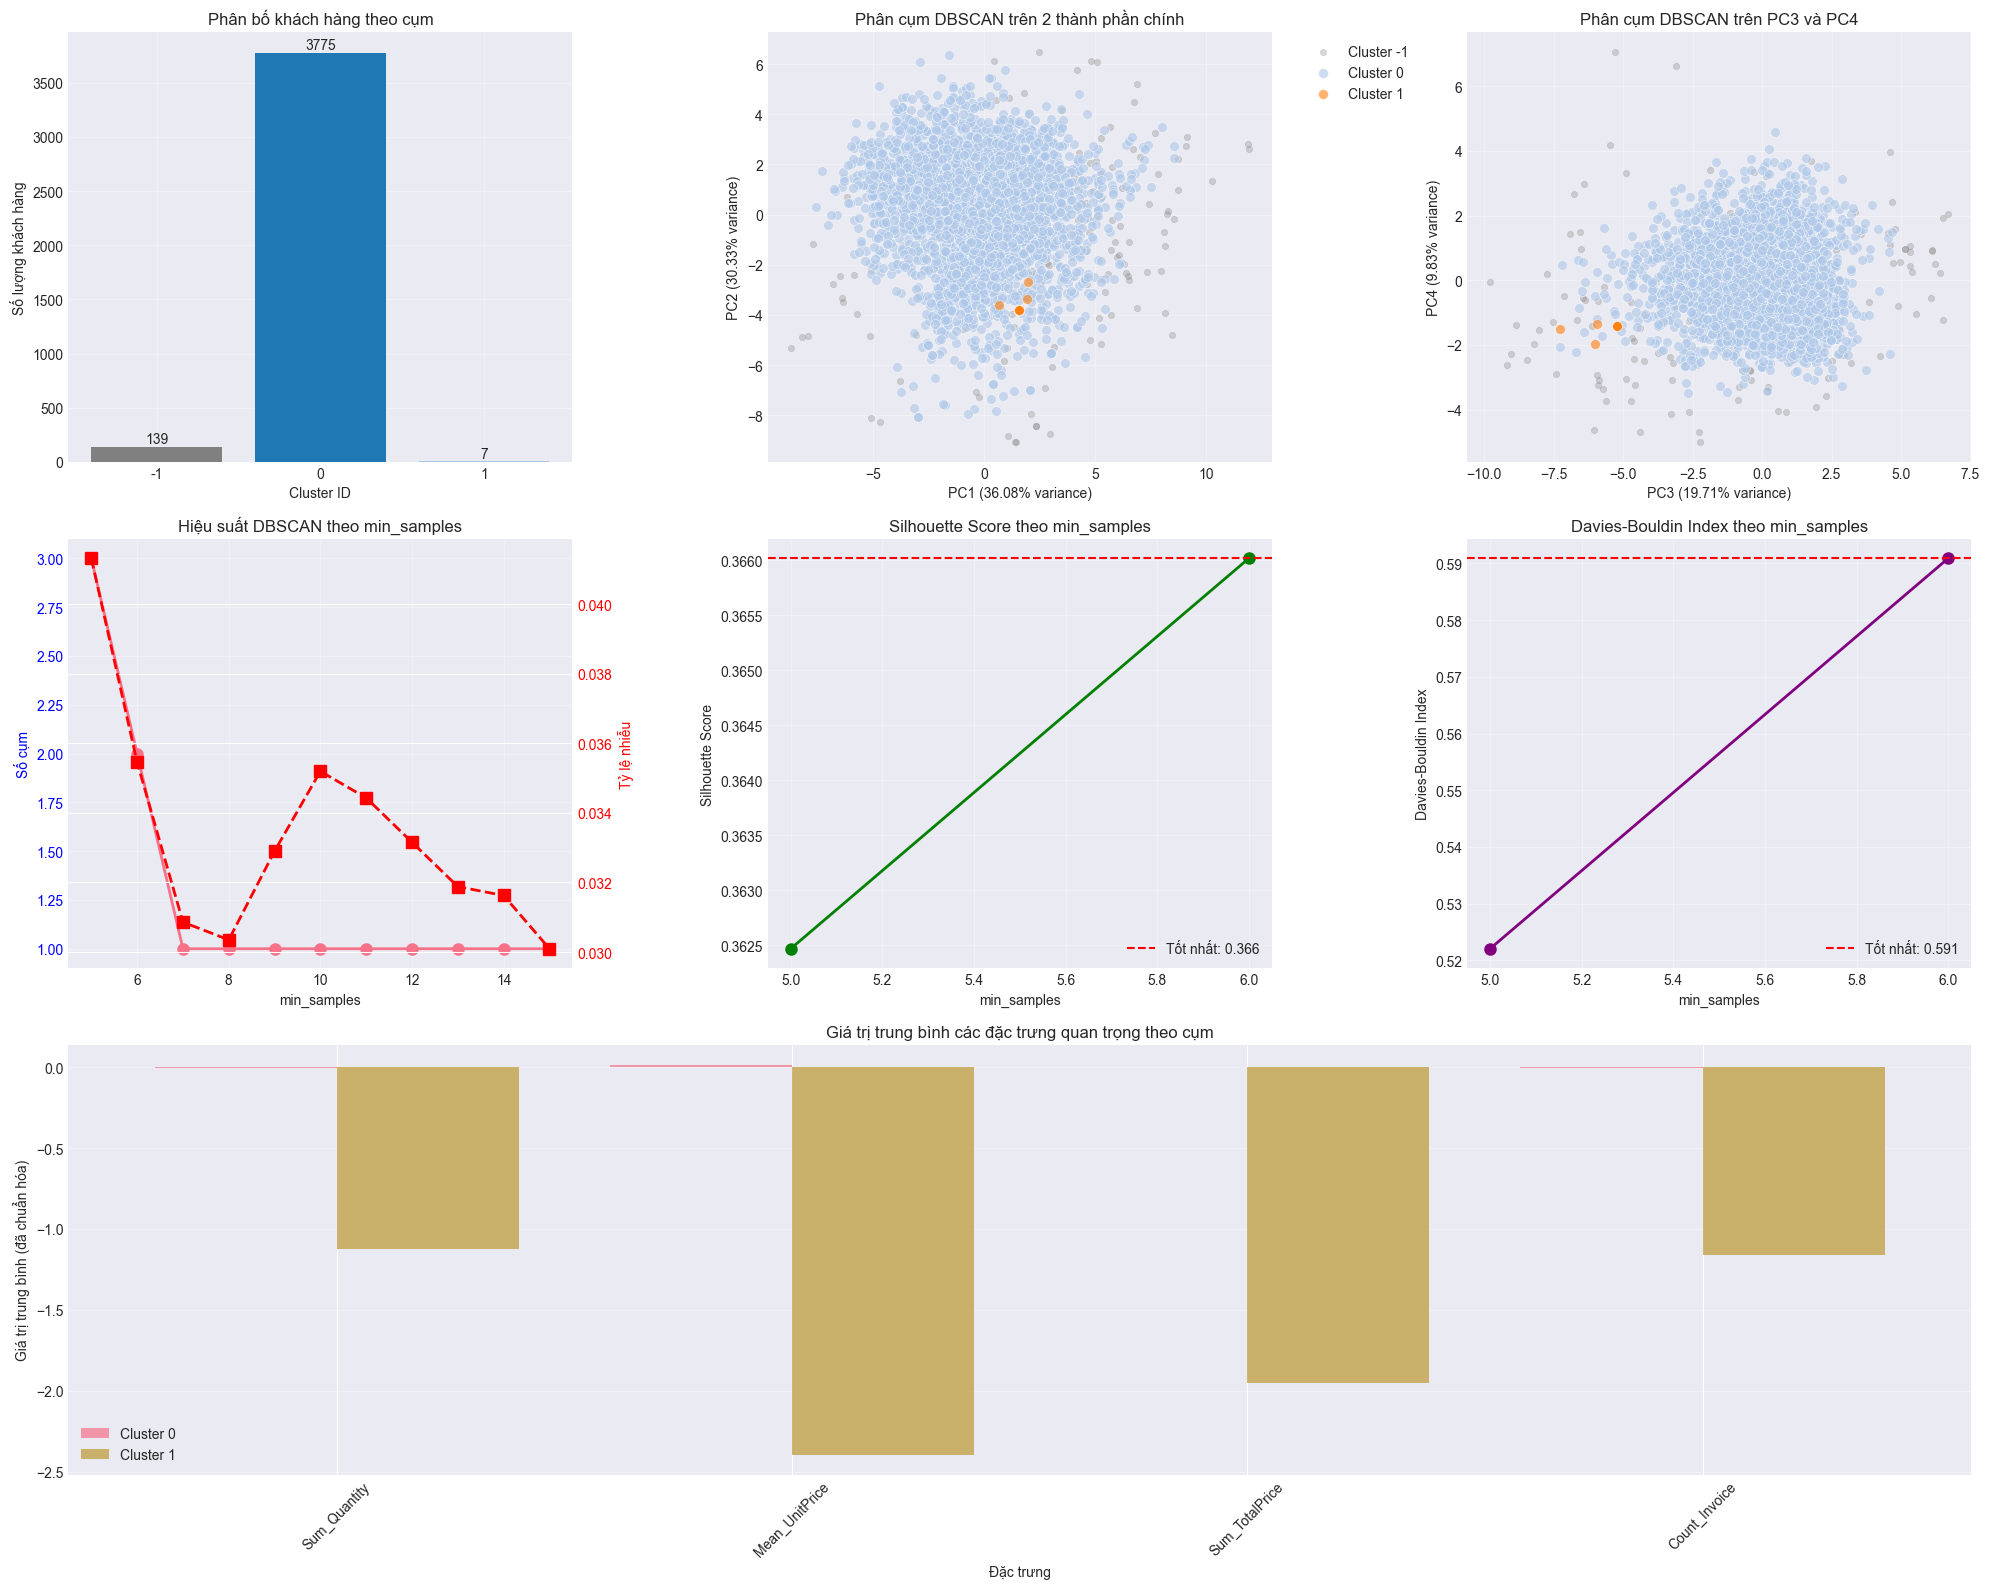

In [27]:
# Tạo figure lớn
fig = plt.figure(figsize=(20, 16))

# 1. Biểu đồ phân bố cụm
ax1 = plt.subplot(3, 3, 1)
cluster_counts = df_final['cluster'].value_counts().sort_index()
colors = ['gray' if idx == -1 else plt.cm.tab20(idx % 20) 
          for idx in cluster_counts.index]

bars = ax1.bar(cluster_counts.index.astype(str), cluster_counts.values, color=colors)
ax1.set_xlabel('Cluster ID')
ax1.set_ylabel('Số lượng khách hàng')
ax1.set_title('Phân bố khách hàng theo cụm')
ax1.grid(True, alpha=0.3)

# Thêm số lượng trên mỗi bar
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom')

# 2. Trực quan hóa trên 2 thành phần chính đầu tiên
ax2 = plt.subplot(3, 3, 2)
unique_labels = np.unique(final_labels)
colors = [plt.cm.tab20(i % 20) for i in range(len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'gray'
        alpha = 0.3
        size = 20
    else:
        alpha = 0.6
        size = 50
    
    mask = final_labels == label
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=[color], alpha=alpha, s=size, 
               edgecolors='w' if label != -1 else None,
               linewidth=0.5, label=f'Cluster {label}')

ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.set_title('Phân cụm DBSCAN trên 2 thành phần chính')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# 3. Trực quan hóa trên 2 thành phần chính khác
ax3 = plt.subplot(3, 3, 3)
for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'gray'
        alpha = 0.3
        size = 20
    else:
        alpha = 0.6
        size = 50
    
    mask = final_labels == label
    ax3.scatter(X_pca[mask, 2], X_pca[mask, 3], 
               c=[color], alpha=alpha, s=size,
               edgecolors='w' if label != -1 else None,
               linewidth=0.5)

ax3.set_xlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')
ax3.set_ylabel(f'PC4 ({pca.explained_variance_ratio_[3]:.2%} variance)')
ax3.set_title('Phân cụm DBSCAN trên PC3 và PC4')
ax3.grid(True, alpha=0.3)

# 4. Biểu đồ hiệu suất theo min_samples
ax4 = plt.subplot(3, 3, 4)
x = results_df['min_samples']
ax4.plot(x, results_df['n_clusters'], 'o-', linewidth=2, markersize=8)
ax4.set_xlabel('min_samples')
ax4.set_ylabel('Số cụm', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')
ax4.set_title('Hiệu suất DBSCAN theo min_samples')
ax4.grid(True, alpha=0.3)

ax4_twin = ax4.twinx()
ax4_twin.plot(x, results_df['noise_rate'], 's--', color='red', 
              linewidth=2, markersize=8)
ax4_twin.set_ylabel('Tỷ lệ nhiễu', color='red')
ax4_twin.tick_params(axis='y', labelcolor='red')

# 5. Biểu đồ silhouette score
ax5 = plt.subplot(3, 3, 5)
mask = results_df['silhouette'].notna()
if mask.any():
    ax5.plot(results_df.loc[mask, 'min_samples'], 
             results_df.loc[mask, 'silhouette'], 
             'o-', linewidth=2, markersize=8, color='green')
    ax5.axhline(y=best_result['silhouette'], color='r', linestyle='--', 
                label=f'Tốt nhất: {best_result["silhouette"]:.3f}')
    ax5.set_xlabel('min_samples')
    ax5.set_ylabel('Silhouette Score')
    ax5.set_title('Silhouette Score theo min_samples')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

# 6. Biểu đồ Davies-Bouldin index
ax6 = plt.subplot(3, 3, 6)
mask = results_df['davies_bouldin'].notna()
if mask.any():
    ax6.plot(results_df.loc[mask, 'min_samples'], 
             results_df.loc[mask, 'davies_bouldin'], 
             'o-', linewidth=2, markersize=8, color='purple')
    if not pd.isna(best_result['davies_bouldin']):
        ax6.axhline(y=best_result['davies_bouldin'], color='r', linestyle='--',
                   label=f'Tốt nhất: {best_result["davies_bouldin"]:.3f}')
    ax6.set_xlabel('min_samples')
    ax6.set_ylabel('Davies-Bouldin Index')
    ax6.set_title('Davies-Bouldin Index theo min_samples')
    ax6.legend()
    ax6.grid(True, alpha=0.3)

# 7. Phân tích đặc trưng trung bình của các cụm
ax7 = plt.subplot(3, 3, (7, 9))
important_features = ['Sum_Quantity', 'Mean_UnitPrice', 'Sum_TotalPrice', 'Count_Invoice']
cluster_means = []

for cluster_id in sorted(df_final['cluster'].unique()):
    if cluster_id == -1:
        continue
    cluster_data = df_final[df_final['cluster'] == cluster_id]
    means = [cluster_data[feature].mean() for feature in important_features]
    cluster_means.append(means)

if cluster_means:
    cluster_means = np.array(cluster_means)
    x = np.arange(len(important_features))
    width = 0.8 / len(cluster_means)
    
    for i, (means, cluster_id) in enumerate(zip(cluster_means, 
                                                sorted([c for c in df_final['cluster'].unique() if c != -1]))):
        offset = (i - len(cluster_means)/2 + 0.5) * width
        ax7.bar(x + offset, means, width, 
               label=f'Cluster {cluster_id}', 
               alpha=0.7)
    
    ax7.set_xlabel('Đặc trưng')
    ax7.set_ylabel('Giá trị trung bình (đã chuẩn hóa)')
    ax7.set_title('Giá trị trung bình các đặc trưng quan trọng theo cụm')
    ax7.set_xticks(x)
    ax7.set_xticklabels(important_features, rotation=45)
    ax7.legend()
    ax7.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [28]:
# Phân tích chi tiết từng cụm
print("="*80)
print("PHÂN TÍCH CHUYÊN SÂU TỪNG CỤM")
print("="*80)

# Chỉ phân tích các cụm không phải nhiễu
valid_clusters = [c for c in sorted(df_final['cluster'].unique()) if c != -1]

if valid_clusters:
    for cluster_id in valid_clusters:
        cluster_data = df_final[df_final['cluster'] == cluster_id]
        
        print(f"\n{'='*60}")
        print(f"PHÂN TÍCH CLUSTER {cluster_id}")
        print(f"{'='*60}")
        print(f"Số lượng khách hàng: {len(cluster_data)} ({len(cluster_data)/len(df_final):.2%})")
        
        # Tính giá trị trung bình và độ lệch chuẩn của các đặc trưng quan trọng
        feature_stats = []
        for feature in X.columns:
            mean_val = cluster_data[feature].mean()
            std_val = cluster_data[feature].std()
            feature_stats.append({
                'feature': feature,
                'mean': mean_val,
                'std': std_val,
                'abs_mean': abs(mean_val)
            })
        
        # Sắp xếp theo giá trị tuyệt đối trung bình (để tìm đặc trưng nổi bật)
        feature_stats.sort(key=lambda x: x['abs_mean'], reverse=True)
        
        print("\nĐẶC TRƯNG NỔI BẬT:")
        for i, stats in enumerate(feature_stats[:5]):
            print(f"  {i+1}. {stats['feature']}: {stats['mean']:.3f} ± {stats['std']:.3f}")
        
        # Phân tích hành vi khách hàng
        print("\nPHÂN TÍCH HÀNH VI KHÁCH HÀNG:")
        
        # 1. Phân tích số lượng mua hàng
        sum_qty_mean = cluster_data['Sum_Quantity'].mean()
        if sum_qty_mean > 0.5:
            print("  - Khách hàng mua số lượng LỚN")
        elif sum_qty_mean < -0.5:
            print("  - Khách hàng mua số lượng NHỎ")
        else:
            print("  - Khách hàng mua số lượng TRUNG BÌNH")
        
        # 2. Phân tích giá trung bình
        mean_price = cluster_data['Mean_UnitPrice'].mean()
        if mean_price > 0.5:
            print("  - Thích mua hàng CAO CẤP")
        elif mean_price < -0.5:
            print("  - Thích mua hàng GIÁ RẺ")
        else:
            print("  - Không rõ ràng về mức giá")
        
        # 3. Phân tích tổng chi tiêu
        total_spent = cluster_data['Sum_TotalPrice'].mean()
        if total_spent > 0.5:
            print("  - Tổng chi tiêu CAO")
        elif total_spent < -0.5:
            print("  - Tổng chi tiêu THẤP")
        else:
            print("  - Tổng chi tiêu TRUNG BÌNH")
        
        # 4. Phân tích tần suất mua hàng
        invoice_count = cluster_data['Count_Invoice'].mean()
        if invoice_count > 0.5:
            print("  - Mua hàng THƯỜNG XUYÊN")
        elif invoice_count < -0.5:
            print("  - Mua hàng KHÔNG THƯỜNG XUYÊN")
        else:
            print("  - Tần suất mua hàng TRUNG BÌNH")
        
        print("\nKHÁCH HÀNG TIÊU BIỂU (5 khách hàng đầu tiên):")
        display(cluster_data.reset_index()[['CustomerID', 'Sum_Quantity', 'Mean_UnitPrice', 
                     'Sum_TotalPrice', 'Count_Invoice']].head())


PHÂN TÍCH CHUYÊN SÂU TỪNG CỤM

PHÂN TÍCH CLUSTER 0
Số lượng khách hàng: 3775 (96.28%)

ĐẶC TRƯNG NỔI BẬT:
  1. Mean_StockCountPerInvoice: 0.052 ± 0.949
  2. Mean_TotalPriceSumPerStock: -0.048 ± 0.944
  3. Mean_TotalPriceMeanPerStock: -0.048 ± 0.940
  4. Mean_TotalPrice: -0.048 ± 0.941
  5. Mean_TotalPriceMeanPerInvoice: -0.048 ± 0.944

PHÂN TÍCH HÀNH VI KHÁCH HÀNG:
  - Khách hàng mua số lượng TRUNG BÌNH
  - Không rõ ràng về mức giá
  - Tổng chi tiêu TRUNG BÌNH
  - Tần suất mua hàng TRUNG BÌNH

KHÁCH HÀNG TIÊU BIỂU (5 khách hàng đầu tiên):


,CustomerID,Sum_Quantity,Mean_UnitPrice,Sum_TotalPrice,Count_Invoice
0,012747,0.879252,0.879583,1.397472,1.532615
1,012749,0.982814,1.125208,1.379978,0.890138
2,012820,0.466642,-0.817031,0.296923,0.656870
3,012821,-1.233887,-0.235351,-1.725684,-1.158633
4,012822,0.268811,-0.078187,0.302366,-0.198605



PHÂN TÍCH CLUSTER 1
Số lượng khách hàng: 7 (0.18%)

ĐẶC TRƯNG NỔI BẬT:
  1. Mean_UnitPriceMeanPerStock: -2.423 ± 0.482
  2. Mean_UnitPrice: -2.397 ± 0.474
  3. Mean_UnitPriceMeanPerInvoice: -2.376 ± 0.473
  4. Mean_StockCountPerInvoice: -2.307 ± 0.000
  5. Count_Stock: -2.296 ± 0.000

PHÂN TÍCH HÀNH VI KHÁCH HÀNG:
  - Khách hàng mua số lượng NHỎ
  - Thích mua hàng GIÁ RẺ
  - Tổng chi tiêu THẤP
  - Mua hàng KHÔNG THƯỜNG XUYÊN

KHÁCH HÀNG TIÊU BIỂU (5 khách hàng đầu tiên):


,CustomerID,Sum_Quantity,Mean_UnitPrice,Sum_TotalPrice,Count_Invoice
0,013841,-0.974083,-2.532613,-1.809410,-1.158633
1,014090,-1.213389,-2.080316,-1.913935,-1.158633
2,015668,-1.213389,-2.080316,-1.913935,-1.158633
3,015753,-0.708096,-3.343978,-1.877894,-1.158633
4,016148,-1.213389,-2.080316,-1.913935,-1.158633


In [29]:
print("="*80)
print("KẾT LUẬN VÀ ĐỀ XUẤT")
print("="*80)

# Tóm tắt kết quả
n_clusters = best_result['n_clusters']
noise_rate = best_result['noise_rate']
silhouette = best_result['silhouette']
db_index = best_result['davies_bouldin']

print(f"\nTỔNG QUAN KẾT QUẢ PHÂN CỤM:")
print(f"   • Số cụm phát hiện: {n_clusters}")
print(f"   • Tỷ lệ nhiễu: {noise_rate:.2%}")
print(f"   • Silhouette score: {silhouette:.4f}" + 
      (" (tốt)" if silhouette and silhouette > 0.5 else 
       " (khá)" if silhouette and silhouette > 0.25 else 
       " (yếu)" if silhouette else " (không tính được)"))
print(f"   • Davies-Bouldin index: {db_index:.4f}" + 
      (" (tốt)" if db_index and db_index < 0.6 else 
       " (khá)" if db_index and db_index < 1.0 else 
       " (yếu)" if db_index else " (không tính được)"))

print("\nGIẢI THÍCH KẾT QUẢ:")
print("   1. Silhouette Score: Đo lường mức độ tương đồng trong cụm và khác biệt giữa các cụm.")
print("      - > 0.5: Các cụm rất rõ ràng")
print("      - 0.25 - 0.5: Các cụm ổn định")
print("      - < 0.25: Các cụm yếu, lẫn vào nhau")

print("\n   2. Davies-Bouldin Index: Đo lường độ phân tách giữa các cụm.")
print("      - < 0.6: Các cụm rất rõ ràng")
print("      - 0.6 - 1.0: Các cụm tốt")
print("      - > 1.0: Các cụm yếu")

print("\nĐỀ XUẤT ỨNG DỤNG:")
print("   1. Marketing tập trung: Mỗi cụm đại diện cho một nhóm khách hàng có hành vi tương tự.")
print("   2. Chiến lược bán hàng:")
print("      • Cluster mua nhiều: Ưu đãi loyalty, cross-selling")
print("      • Cluster mua ít: Khuyến mãi, giới thiệu sản phẩm")
print("      • Cluster thích hàng cao cấp: Giới thiệu sản phẩm premium")
print("   3. Phát triển sản phẩm: Phân tích sở thích từng nhóm để phát triển sản phẩm phù hợp.")
print("   4. Dự báo doanh thu: Sử dụng phân cụm để dự báo doanh thu theo nhóm khách hàng.")

print("\nHẠN CHẾ VÀ HƯỚNG PHÁT TRIỂN:")
print("   1. DBSCAN nhạy cảm với tham số: Cần thử nghiệm nhiều giá trị eps và min_samples.")
print("   2. Dữ liệu nhiễu: Tỷ lệ nhiễu cao có thể ảnh hưởng đến chất lượng cụm.")
print("   3. Hướng phát triển:")
print("      • Thử nghiệm với thuật toán khác (HDBSCAN, OPTICS)")
print("      • Kết hợp với phân cụm phân cấp")
print("      • Áp dụng deep learning để học đặc trưng tự động")

# Lưu kết quả
print("\nLƯU KẾT QUẢ:")
output_file = '../result/DBSCAN/customer_clusters_results.csv'
df_final.to_csv(output_file, index=False)
print(f"   Kết quả đã được lưu vào: {output_file}")
print(f"   Tổng số bản ghi: {len(df_final)}")
print(f"   Các cột: {', '.join(df_final.columns.tolist())}")

KẾT LUẬN VÀ ĐỀ XUẤT

TỔNG QUAN KẾT QUẢ PHÂN CỤM:
   • Số cụm phát hiện: 2.0
   • Tỷ lệ nhiễu: 3.55%
   • Silhouette score: 0.3660 (khá)
   • Davies-Bouldin index: 0.5909 (tốt)

GIẢI THÍCH KẾT QUẢ:
   1. Silhouette Score: Đo lường mức độ tương đồng trong cụm và khác biệt giữa các cụm.
      - > 0.5: Các cụm rất rõ ràng
      - 0.25 - 0.5: Các cụm ổn định
      - < 0.25: Các cụm yếu, lẫn vào nhau

   2. Davies-Bouldin Index: Đo lường độ phân tách giữa các cụm.
      - < 0.6: Các cụm rất rõ ràng
      - 0.6 - 1.0: Các cụm tốt
      - > 1.0: Các cụm yếu

ĐỀ XUẤT ỨNG DỤNG:
   1. Marketing tập trung: Mỗi cụm đại diện cho một nhóm khách hàng có hành vi tương tự.
   2. Chiến lược bán hàng:
      • Cluster mua nhiều: Ưu đãi loyalty, cross-selling
      • Cluster mua ít: Khuyến mãi, giới thiệu sản phẩm
      • Cluster thích hàng cao cấp: Giới thiệu sản phẩm premium
   3. Phát triển sản phẩm: Phân tích sở thích từng nhóm để phát triển sản phẩm phù hợp.
   4. Dự báo doanh thu: Sử dụng phân cụm để 

In [30]:
def analyze_customer_clusters(data_path, n_components=5, min_samples_range=range(5, 16)):
    """
    Hàm tổng hợp để phân tích phân cụm khách hàng.
    
    Parameters:
    -----------
    data_path : str
        Đường dẫn đến file dữ liệu
    n_components : int
        Số thành phần chính cho PCA
    min_samples_range : range
        Dải giá trị min_samples để thử nghiệm
    
    Returns:
    --------
    dict: Kết quả phân tích
    """
    
    # Tải dữ liệu
    df = pd.read_csv(data_path)
    customer_ids = df['CustomerID']
    X = df.drop(columns=['CustomerID'])
    
    # Áp dụng PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Thử nghiệm các tham số
    results = []
    for ms in min_samples_range:
        eps_opt = find_optimal_eps(X_pca, ms)
        metrics = run_dbscan_with_metrics(X_pca, eps_opt, ms)
        
        results.append({
            'min_samples': ms,
            'eps': eps_opt,
            'n_clusters': metrics['n_clusters'],
            'noise_rate': metrics['noise_rate'],
            'silhouette': metrics['silhouette'],
            'davies_bouldin': metrics['davies_bouldin']
        })
    
    # Tìm tham số tốt nhất
    results_df = pd.DataFrame(results)
    best_idx = results_df['silhouette'].idxmax() if results_df['silhouette'].notna().any() else 0
    best_params = results_df.iloc[best_idx]
    
    # Huấn luyện mô hình cuối cùng
    final_dbscan = DBSCAN(eps=best_params['eps'], 
                         min_samples=int(best_params['min_samples']))
    final_labels = final_dbscan.fit_predict(X_pca)
    
    # Tạo dataframe kết quả
    df_result = df.copy()
    df_result['cluster'] = final_labels
    
    return {
        'data': df_result,
        'pca': pca,
        'X_pca': X_pca,
        'results': results_df,
        'best_params': best_params,
        'model': final_dbscan,
        'labels': final_labels
    }

# Ví dụ sử dụng hàm
if __name__ == "__main__":
    analysis_results = analyze_customer_clusters('../data/processed/customer_features_scaled.csv')

    print("\nTham số tốt nhất:")
    print(f"min_samples: {analysis_results['best_params']['min_samples']}")
    print(f"eps: {analysis_results['best_params']['eps']:.4f}")
    print(f"Số cụm: {analysis_results['best_params']['n_clusters']}")
    
    print("\nPhân bố cụm:")
    print(analysis_results['data']['cluster'].value_counts().sort_index())


Tham số tốt nhất:
min_samples: 6.0
eps: 1.7148
Số cụm: 2.0

Phân bố cụm:
cluster
-1     139
 0    3775
 1       7
Name: count, dtype: int64
